# ECG Data Preparation

In this example, you'll use the MIT-BIH Arrhythmia Database, available at https://physionet.org/content/mitdb/1.0.0/

Before running this code, make sure to download the `.atr`, `.dat`, and `.hea` files for the records:
    
- 100
- 101
- 102
- 103
- 104
- 105
- 106
- 107
- 108
- 109
- 111
- 112

After downloading the files, copy them to a folder named `mitdb`.

To load the data, you'll need `wfdb`, available on [PyPI](https://pypi.org/project/wfdb/).

In [1]:
import wfdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Loading the data:

In [2]:
ids = [
    "100",
    "101",
    "102",
    "103",
    "104",
    "105",
    "106",
    "107",
    "108",
    "109",
    "111",
    "112",
]

records = []

for id in ids:
    record = wfdb.rdsamp("mitdb/" + id, sampto=3000)
    records.append(record[0][:, 0])

annotations_indexes = []
for id in ids:
    annotation = wfdb.rdann("mitdb/" + id, "atr", sampto=3000)
    annotations_indexes.append(annotation.sample)

Using the annotations indexes to calculate the mean length of the beats (annotations indexes coincide with the Q points of the ECG signals):

In [3]:
mean_lengths = []
for indexes in annotations_indexes:
    mean_length_local = np.mean(np.diff(indexes[1:]))
    mean_lengths.append(mean_length_local)

mean_length = np.mean(mean_lengths)

You'll consider the beat length as 0.9 * mean_length and the beginning of a beat as 100 samples before the annotation index:

In [4]:
beat_length = np.round(0.9 * mean_length).astype(int)
start_beat = 100

For each signal, you'll loop the annotations vector

In [5]:
beats = []

for i, signal in enumerate(records):
    indexes = annotations_indexes[i]
    for index in indexes:
        signal_i = signal[
            index - start_beat : index - start_beat + beat_length
        ].tolist()
        if len(signal_i) == beat_length:
            beats.append(signal_i)
        else:
            continue

beats_np = np.array(beats)

In [6]:
beats_np.shape

(112, 265)

112 beats with 265 samples each. To save them to a csv file, you can use Pandas:

In [7]:
beats_df = pd.DataFrame(beats_np)
beats_df.to_csv('ECG_beats.csv', index=False)

You can plot the beats with:

/home/renato/.pyenv/versions/miniconda3-4.3.30/envs/main/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


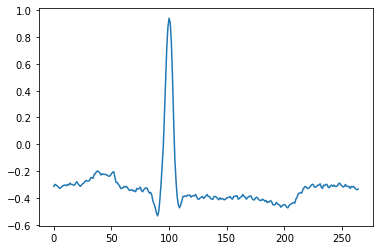

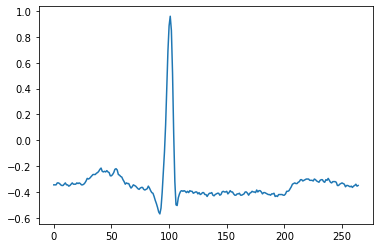

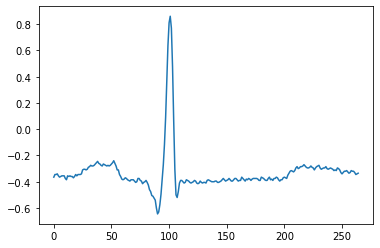

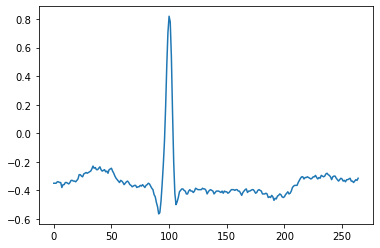

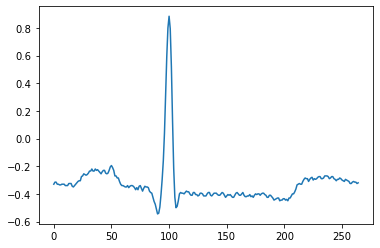

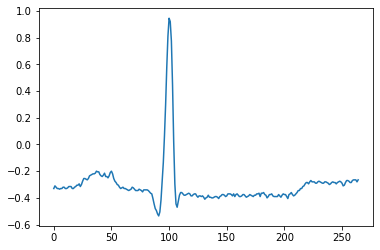

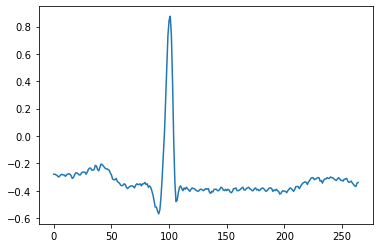

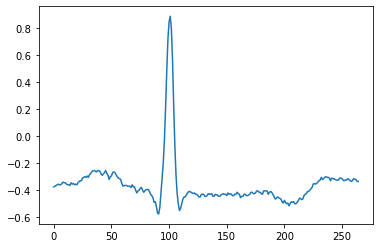

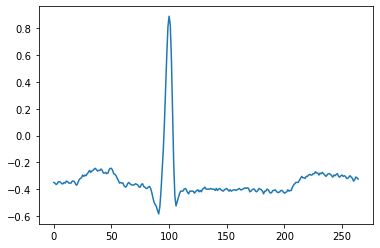

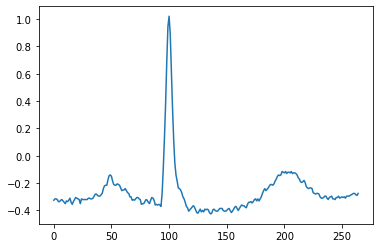

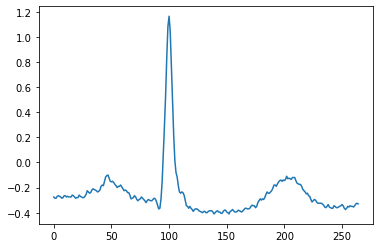

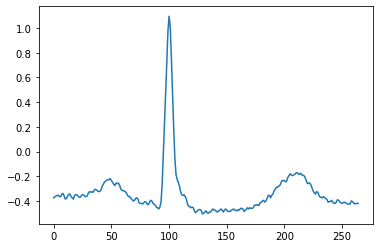

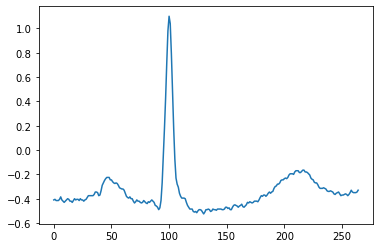

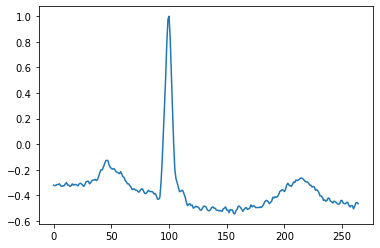

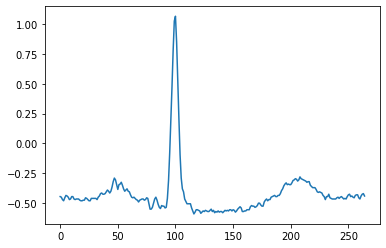

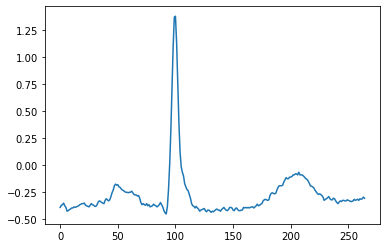

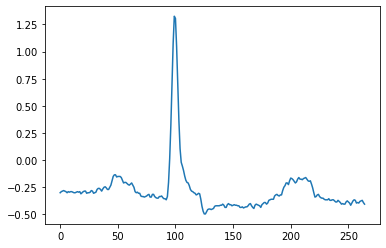

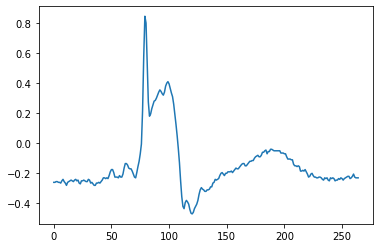

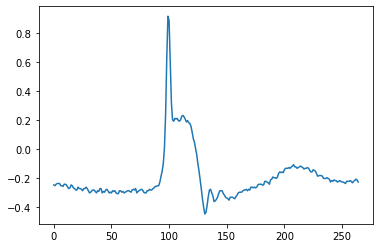

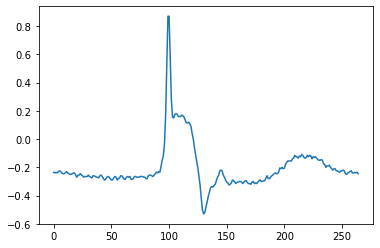

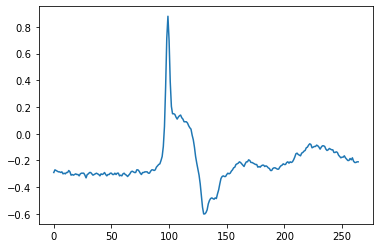

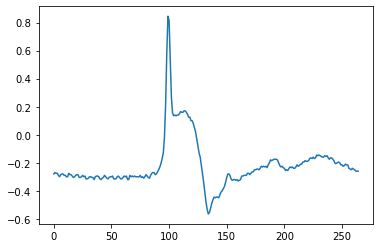

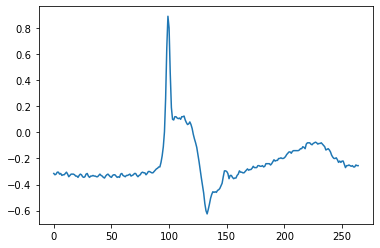

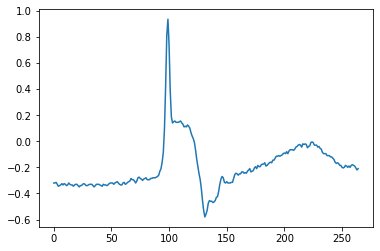

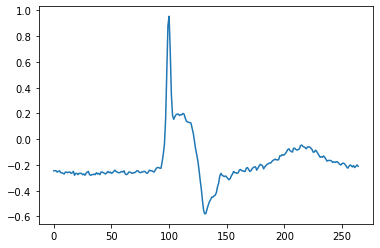

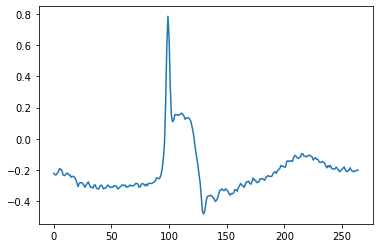

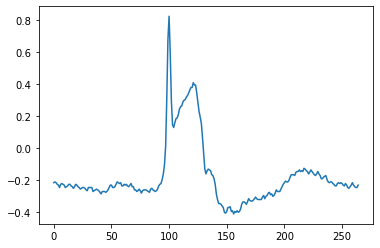

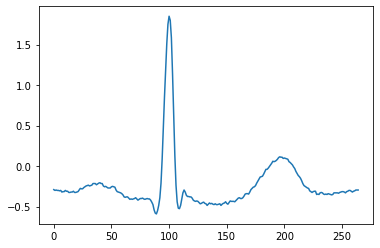

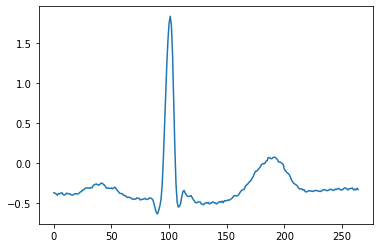

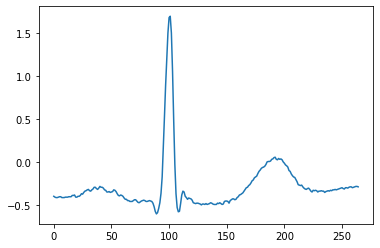

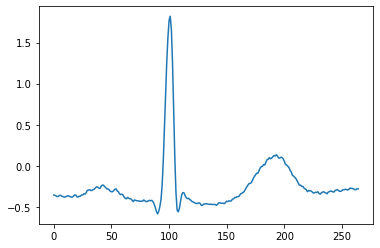

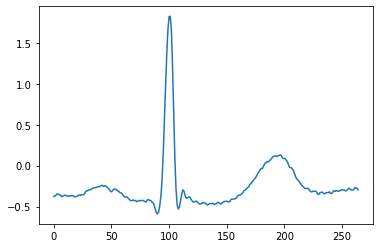

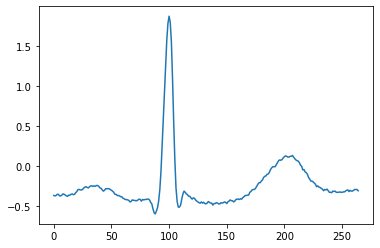

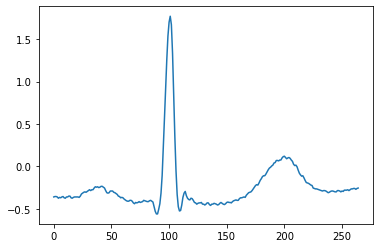

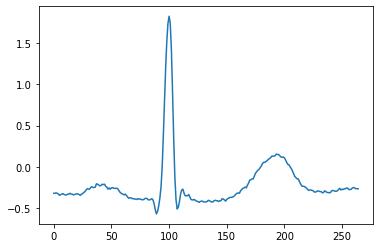

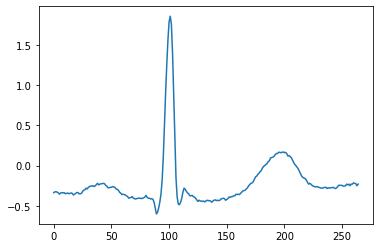

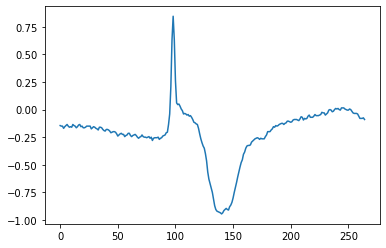

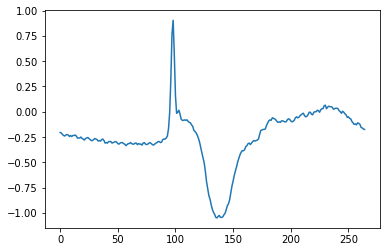

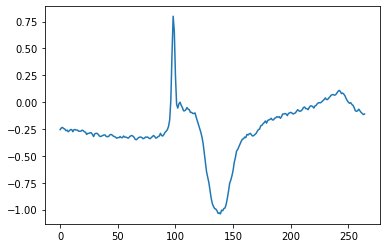

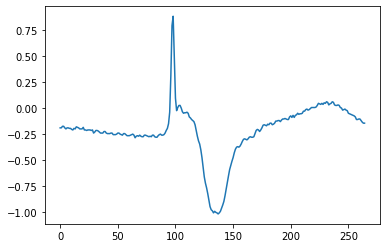

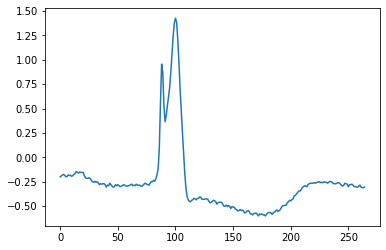

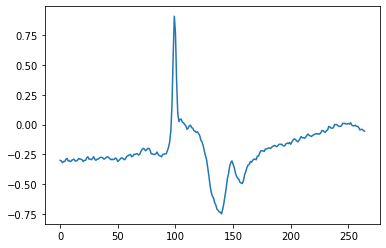

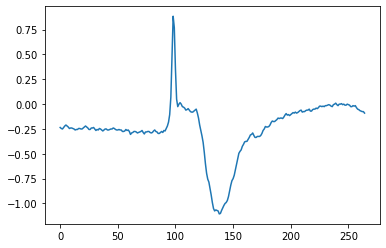

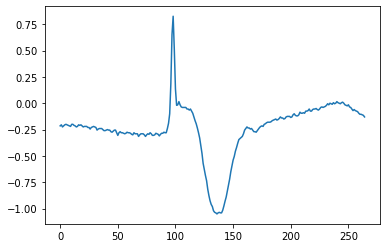

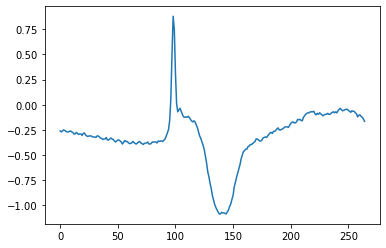

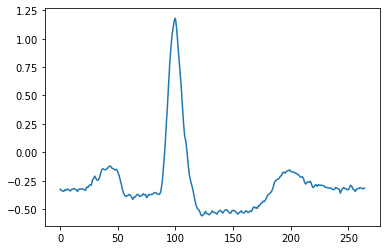

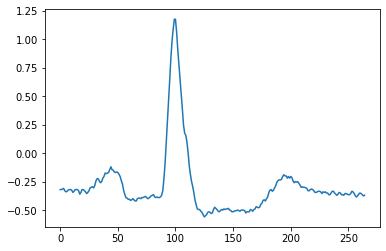

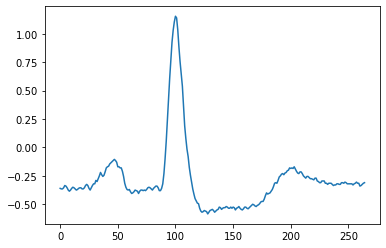

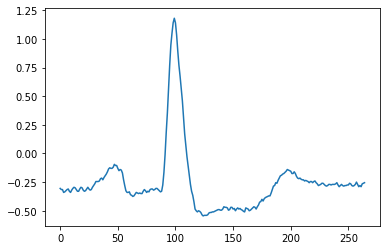

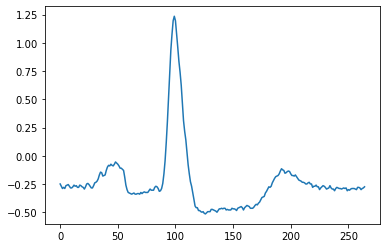

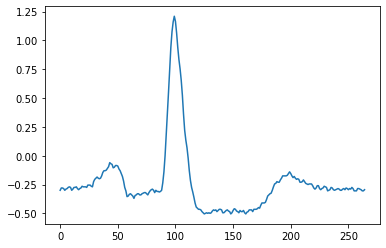

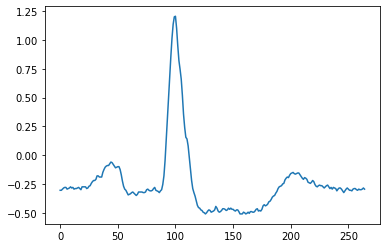

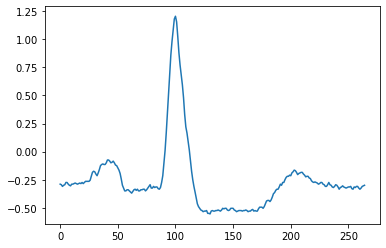

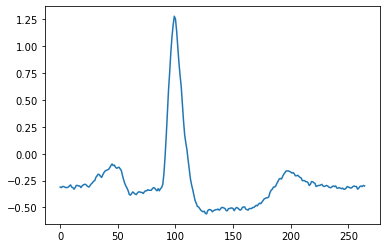

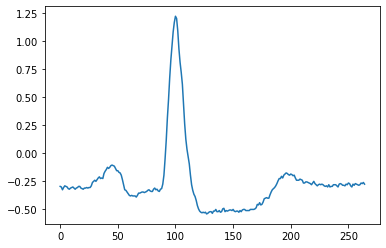

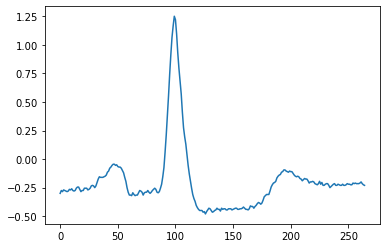

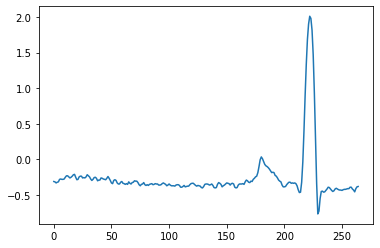

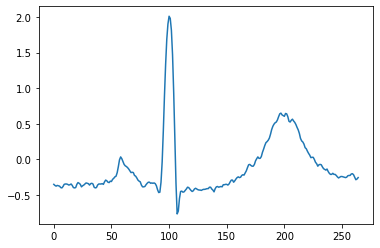

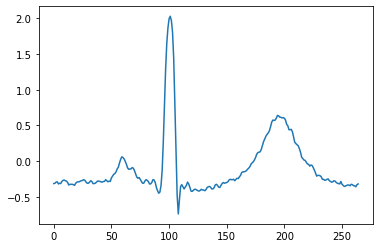

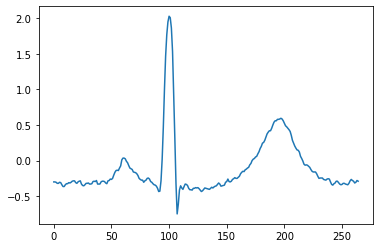

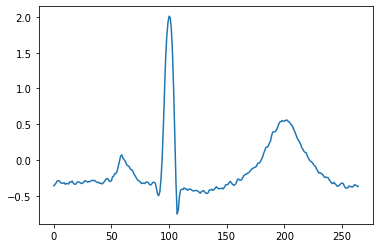

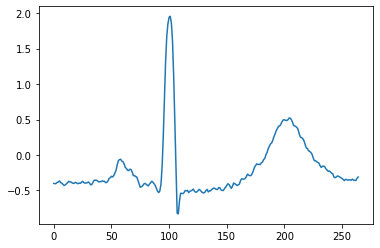

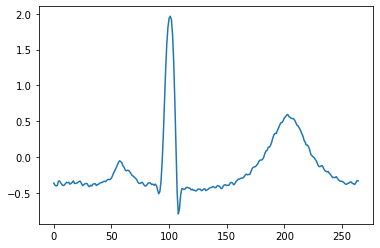

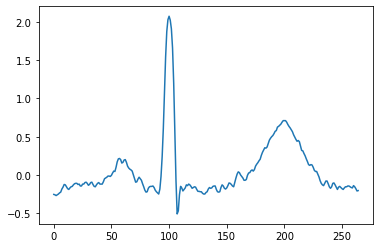

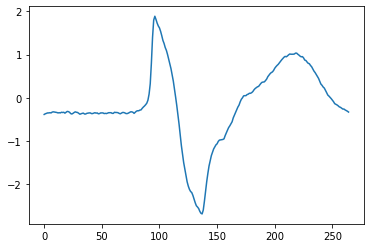

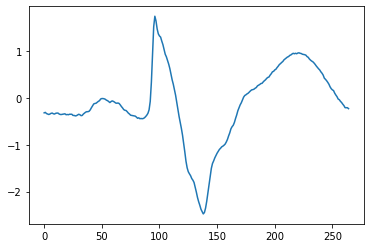

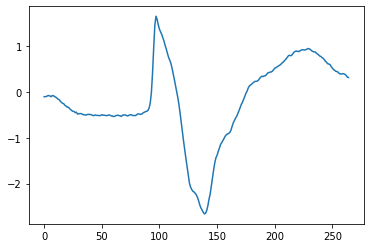

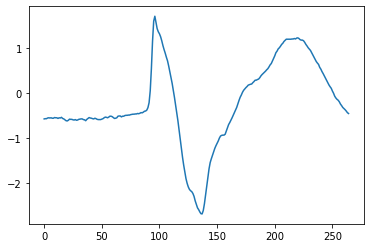

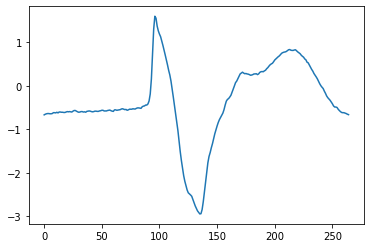

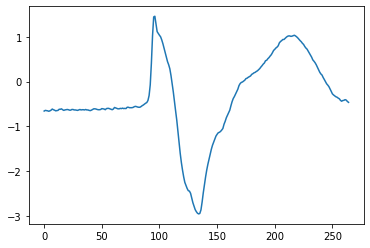

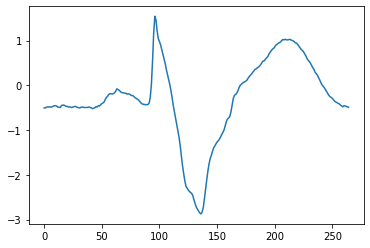

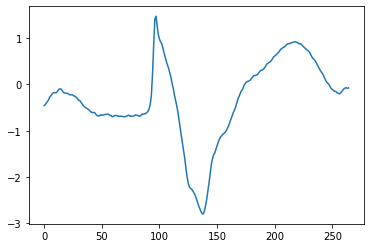

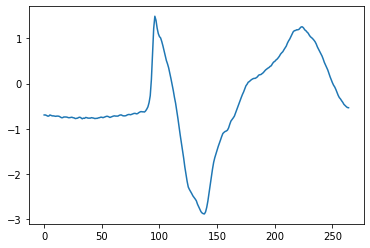

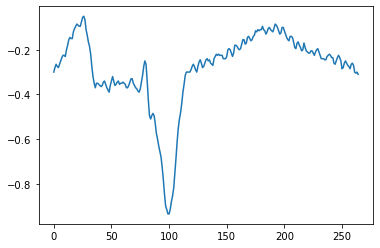

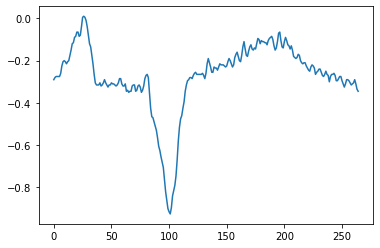

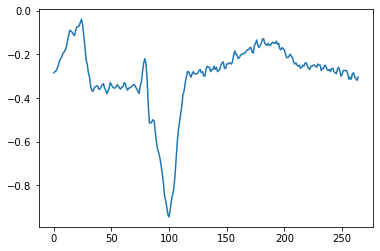

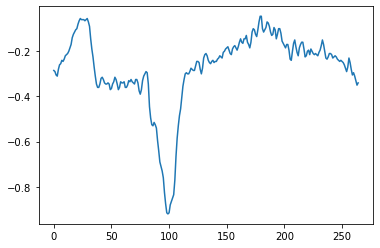

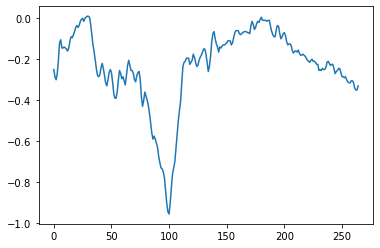

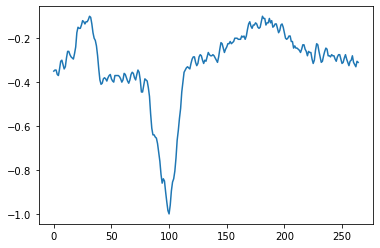

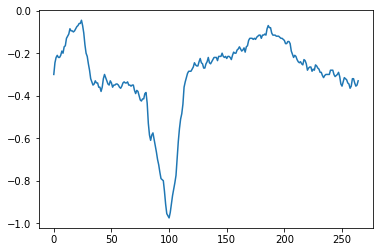

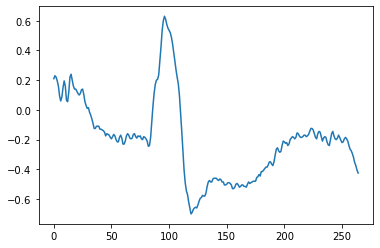

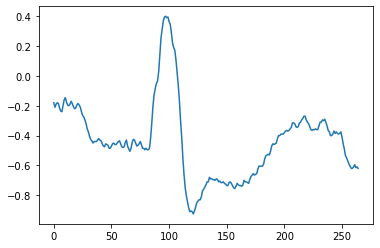

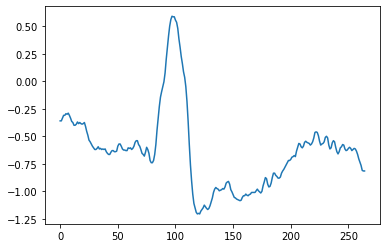

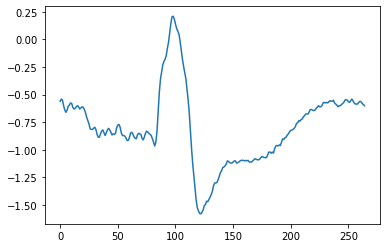

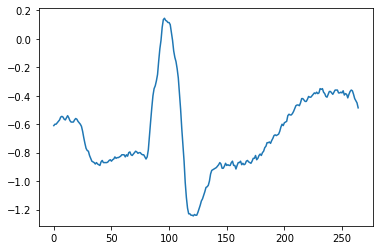

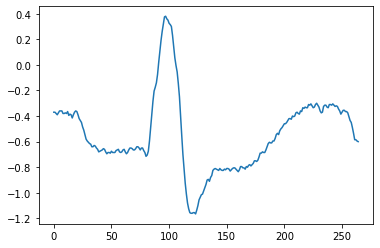

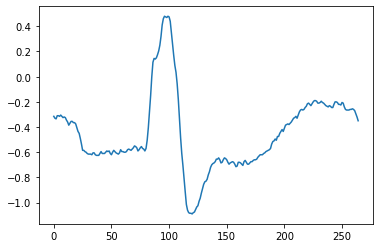

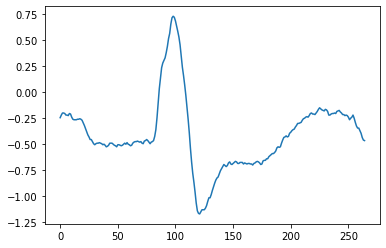

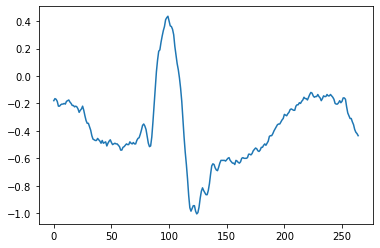

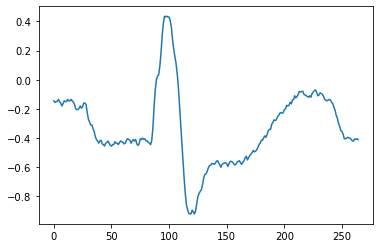

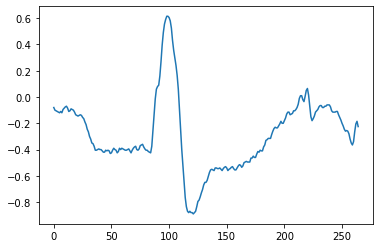

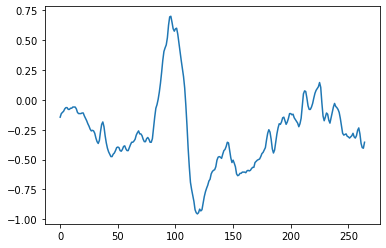

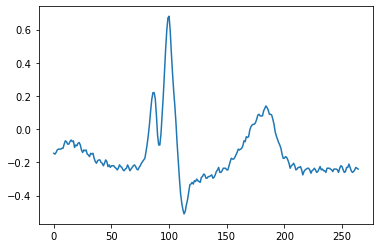

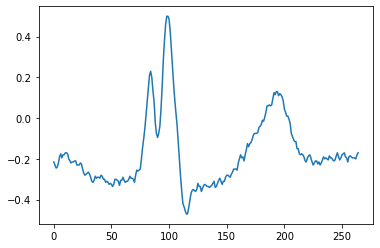

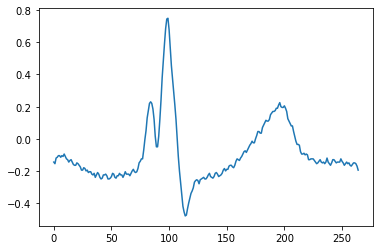

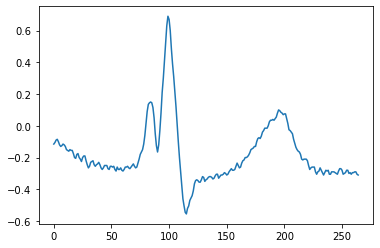

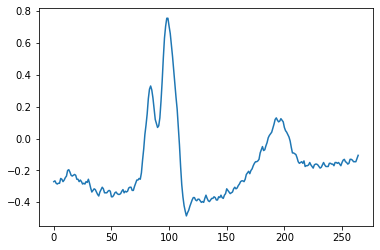

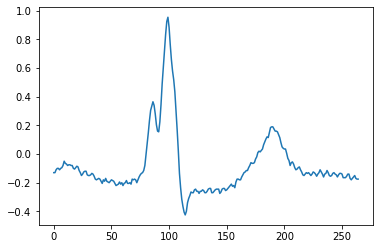

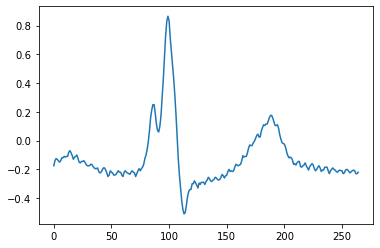

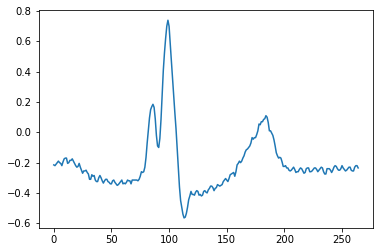

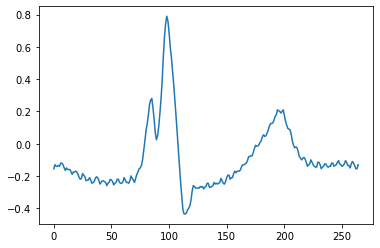

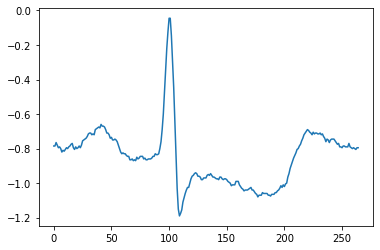

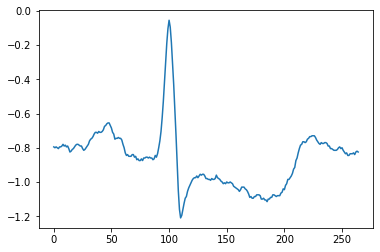

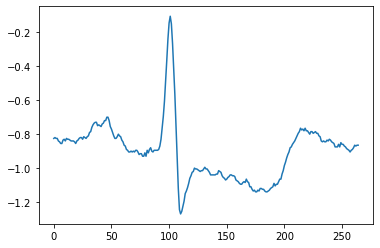

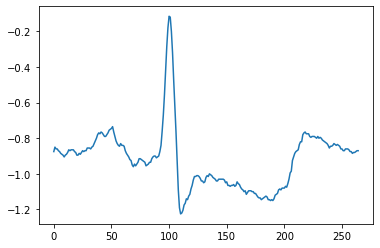

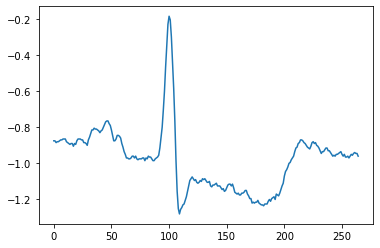

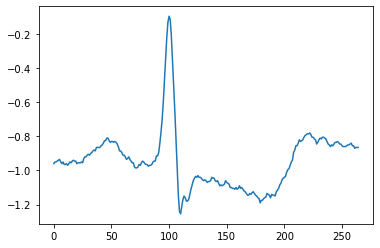

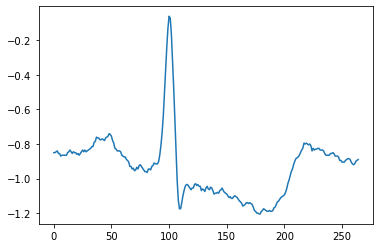

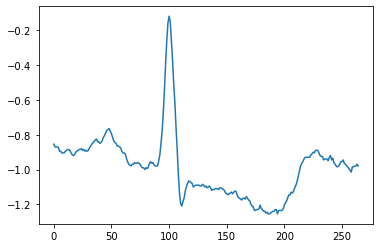

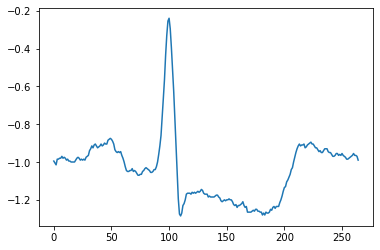

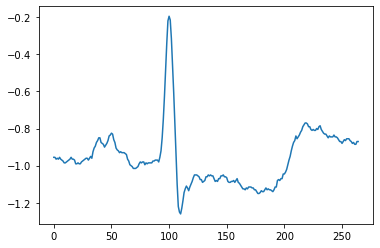

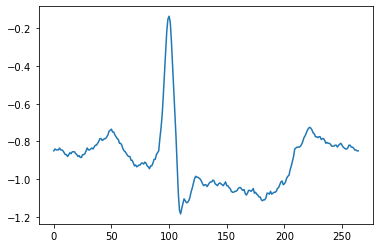

In [8]:
for i in range(beats_np.shape[0]):
    plt.figure()
    plt.plot(beats_np[i, :])